# Problem Statement : 

In India, there are over 400 airports and airstrips, while 153 were operational. Passenger traffic amounted to over 115 million at airports across India in financial year 2021, out of which over 10 million were international passengers. Airline companies use various algorithms to predict flight prices on the basis of dynamically changing financial, marketing and social aspects.

Anyone who've booked an airplane ticket online knows that prices on a particular ticket is always constantly varying. Main objective is to analyse and build a dynamic machine learning model that can predict the flight prices on the basis of information of the flight provided by the airlines.

Main objective is to analyse and build a dynamic machine learning model that can predict the flight prices on the basis of information of the flight provided by the airlines.

Data has been retrieved from https://www.yatra.com which consists of Airlines Flight information of 16 days (from 01-12-2021 to 16-12-2021) such as Airlines Name, Date of Departure, Time of Departure, Time of Arrival, Duration of Flight, Number of Stops, Meals included and Price of the ticket. 

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


#Importing Predictive Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.formula.api as smf

#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib

In [2]:
#Loading Dataset
df = pd.read_excel("Yatra.xlsx")
df.head()

,Unnamed: 0,Airlines,Source,Destination,Hours_of_Travel,Takeoff_Time,Arrival_Time,Stops,Meal_Provided,Price,Date
0,0,IndiGo,New Delhi,Chennai,5h 20m,14:00,19:20,1 Stop,No Meal Fare,"4,921",2021-12-01
1,1,IndiGo,New Delhi,Chennai,2h 45m,07:25,10:10,Non Stop,No Meal Fare,"5,924",2021-12-01
2,2,SpiceJet,New Delhi,Chennai,2h 45m,18:25,21:10,Non Stop,No Meal Fare,"5,924",2021-12-01
3,3,IndiGo,New Delhi,Chennai,2h 50m,20:30,23:20,Non Stop,No Meal Fare,"5,924",2021-12-01
4,4,IndiGo,New Delhi,Chennai,2h 50m,23:05,01:55\n+ 1 day,Non Stop,No Meal Fare,"5,924",2021-12-01


In [3]:
# Dropping Unneccesary Column
df.drop("Unnamed: 0", axis =1, inplace = True)

In [4]:
# Shape of Train dataset
print('Shape of our Dataset is Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Shape of our Dataset is Rows: 2250 Columns: 10


In [5]:
#Analsying the dtypes of the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airlines         2250 non-null   object
 1   Source           2250 non-null   object
 2   Destination      2250 non-null   object
 3   Hours_of_Travel  2250 non-null   object
 4   Takeoff_Time     2250 non-null   object
 5   Arrival_Time     2250 non-null   object
 6   Stops            2250 non-null   object
 7   Meal_Provided    2250 non-null   object
 8   Price            2250 non-null   object
 9   Date             2250 non-null   object
dtypes: object(10)
memory usage: 175.9+ KB


In [6]:
#Checking for null values

df.isna().sum()

Airlines           0
Source             0
Destination        0
Hours_of_Travel    0
Takeoff_Time       0
Arrival_Time       0
Stops              0
Meal_Provided      0
Price              0
Date               0
dtype: int64

<AxesSubplot:>

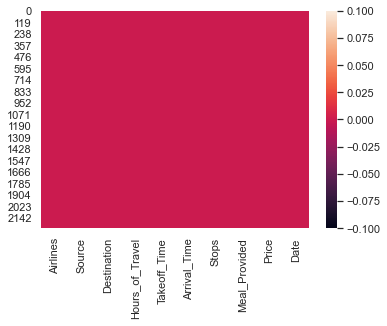

In [7]:
sns.heatmap(df.isna())

In [8]:
#Checking for duplicate fields/records

df.duplicated().sum()

119

In [9]:
# Dropping Duplicates
df = df.drop_duplicates()

In [10]:
#Rechecking for duplicate fields/records

df.duplicated().sum()

0

In [11]:
#Statistical Overview of our Numerical Features
df.describe()

,Airlines,Source,Destination,Hours_of_Travel,Takeoff_Time,Arrival_Time,Stops,Meal_Provided,Price,Date
count,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131
unique,6,6,9,331,241,382,5,2,976,16
top,Vistara,New Delhi,Mumbai,2h 15m,07:00,22:50,1 Stop,No Meal Fare,"4,200",2021-12-01
freq,570,654,442,47,43,30,1485,1853,39,271


## Data Cleaning

In [12]:
#Seperating Hour - Minute - columns using pandas Datetime function

df['Takeoff_Time'] = pd.to_datetime(df['Takeoff_Time'])
df['Hour_of_Departure'] = df['Takeoff_Time'].apply(lambda x:x.hour)
df['Minute_of_Departure'] = df['Takeoff_Time'].apply(lambda x:x.minute)

In [13]:
#Seperating Hour - Minute - columns using pandas Datetime function

df['Arrival_Time'] = df['Arrival_Time'].str.split("\n").str[0]
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Hour_of_Arrival'] = df['Arrival_Time'].apply(lambda x:x.hour)
df['Minute_of_Arrival'] = df['Arrival_Time'].apply(lambda x:x.minute)

In [14]:
#Seperating hour and minute of duration and Retreiving numeric value from duration 

df['Duration_Hour'] = df['Hours_of_Travel'].str.split('h').str[0]
df['Duration_Minute'] = df['Hours_of_Travel'].str.split('h').str[1]
df['Duration_Minute'] = df['Duration_Minute'].str.split('m').str[0]

In [15]:
#Replacing Number of Stops with numeric values

df['Stops'] = df['Stops'].str.split(" ").str[0]
df['Stops'] = df['Stops'].replace("Non", 0)

In [16]:
#Seperating Day - Month - Year columns using pandas Datetime function

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Year'] = df['Date'].apply(lambda x:x.year)

In [17]:
# Replacing commas from price column
df['Price'] = df.Price.str.replace(",", "")

In [18]:
#Dropping Unncessary Columns

df.drop(columns = ['Hours_of_Travel','Takeoff_Time','Arrival_Time','Date'], axis = 1,inplace = True)

In [19]:
df['Price'] = df['Price'].astype('int32')

In [20]:
df.head()

,Airlines,Source,Destination,Stops,Meal_Provided,Price,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Duration_Hour,Duration_Minute,Month,Day,Year
0,IndiGo,New Delhi,Chennai,1,No Meal Fare,4921,14,0,19,20,5,20,12,1,2021
1,IndiGo,New Delhi,Chennai,0,No Meal Fare,5924,7,25,10,10,2,45,12,1,2021
2,SpiceJet,New Delhi,Chennai,0,No Meal Fare,5924,18,25,21,10,2,45,12,1,2021
3,IndiGo,New Delhi,Chennai,0,No Meal Fare,5924,20,30,23,20,2,50,12,1,2021
4,IndiGo,New Delhi,Chennai,0,No Meal Fare,5924,23,5,1,55,2,50,12,1,2021


## Univariate Analysis

Text(0.5, 1.0, 'Distribution of Categories of Airlines')

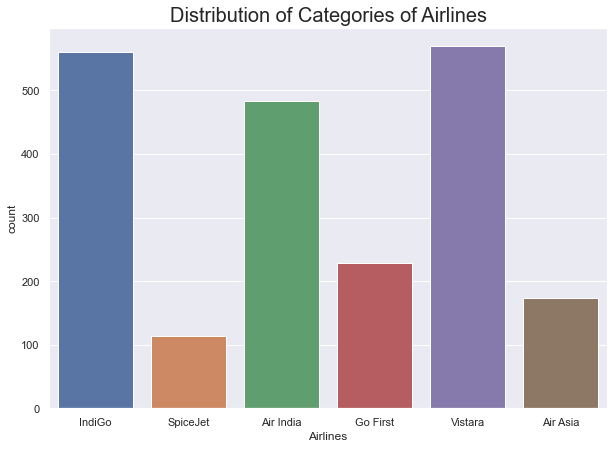

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(df['Airlines'])
plt.title("Distribution of Categories of Airlines", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Categories of Source Take-off')

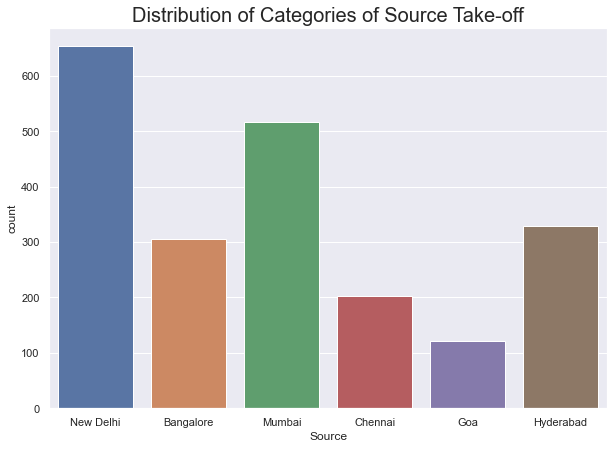

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(df['Source'])
plt.title("Distribution of Categories of Source Take-off", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Categories of Destinations ')

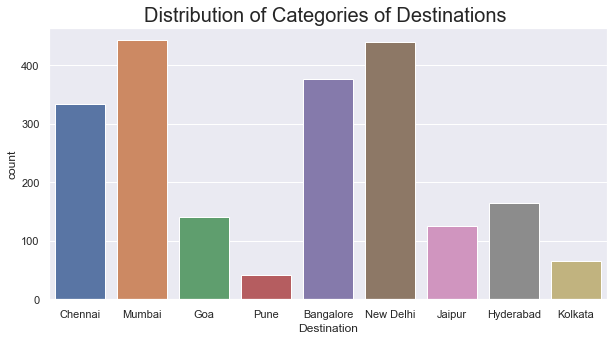

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df['Destination'])
plt.title("Distribution of Categories of Destinations ", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Categories of Total-Stops')

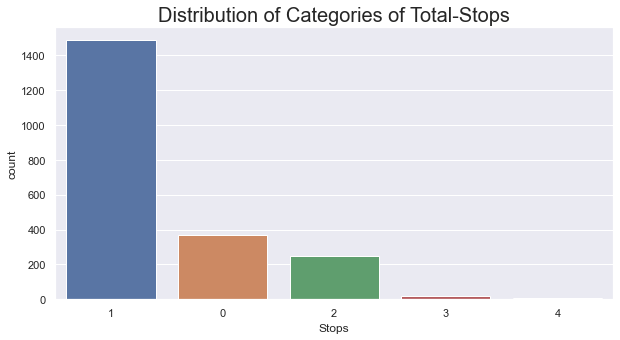

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df['Stops'])
plt.title("Distribution of Categories of Total-Stops", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Categories of Meal_Provided')

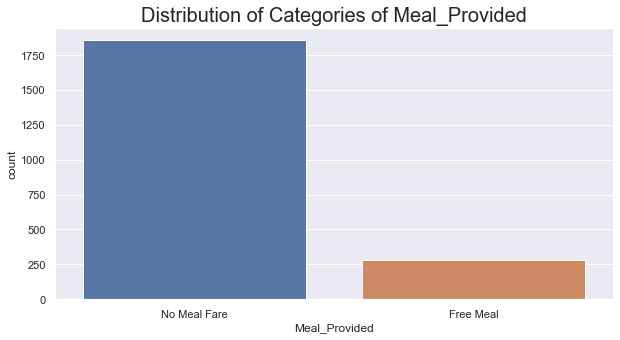

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['Meal_Provided'])
plt.title("Distribution of Categories of Meal_Provided", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Day of Flight')

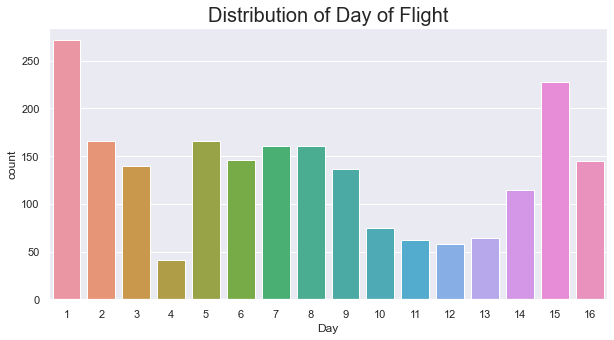

In [26]:
plt.figure(figsize=(10,5))

sns.countplot(data = df, x = 'Day')
plt.title("Distribution of Day of Flight", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Month of Flight')

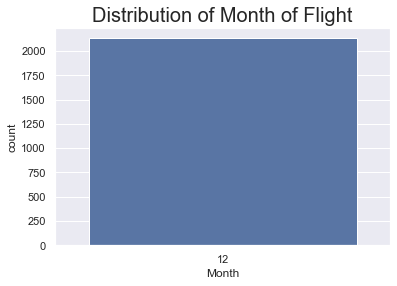

In [28]:
sns.countplot(data = df, x = 'Month')
plt.title("Distribution of Month of Flight", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Year of Flight')

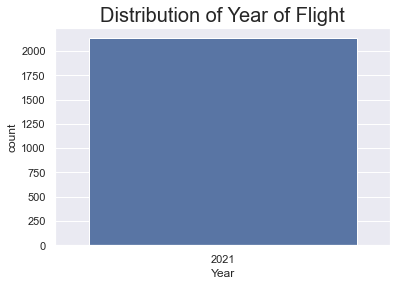

In [29]:
sns.countplot(data = df, x = 'Year')
plt.title("Distribution of Year of Flight", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Hour of Arrival of Flight')

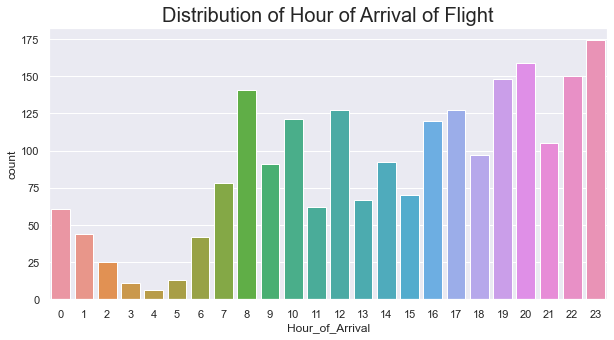

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'Hour_of_Arrival')
plt.title("Distribution of Hour of Arrival of Flight", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Minute of Arrival of Flight')

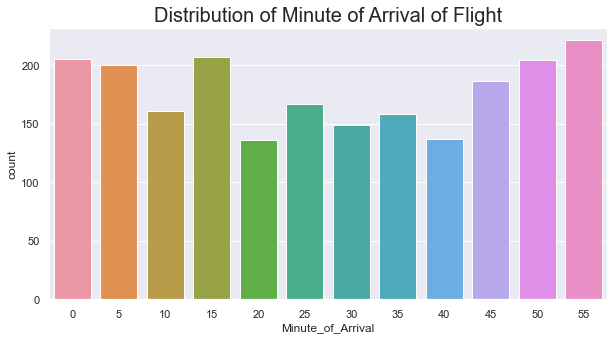

In [31]:
plt.figure(figsize=(10,5))

sns.countplot(data = df, x = 'Minute_of_Arrival')
plt.title("Distribution of Minute of Arrival of Flight", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Minute of Departure of Flight')

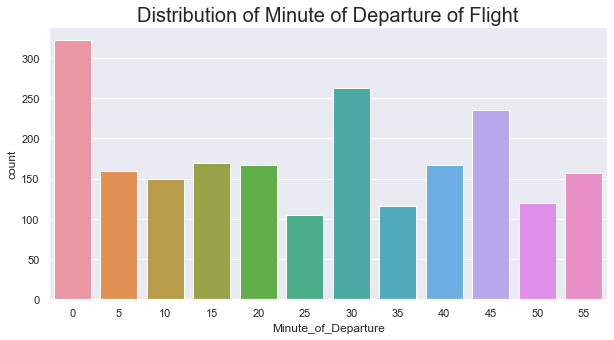

In [32]:
plt.figure(figsize=(10,5))

sns.countplot(data = df, x = 'Minute_of_Departure')
plt.title("Distribution of Minute of Departure of Flight", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Hour of Departure of Flight')

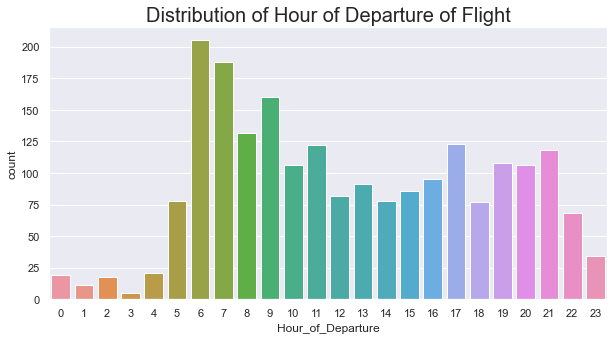

In [33]:
plt.figure(figsize=(10,5))

sns.countplot(data = df, x = 'Hour_of_Departure')
plt.title("Distribution of Hour of Departure of Flight", fontsize = 20)

Text(0.5, 1.0, 'Data Distribution of Flight Prices')

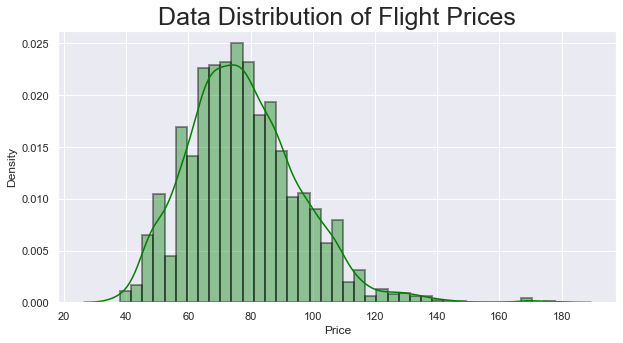

In [98]:
plt.figure(figsize=(10,5))

#Analysing Distribution of AveragePrice
sns.distplot(df['Price'], color = 'green',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Data Distribution of Flight Prices", fontsize = 25)

#### INSIGHTS:

- Indigo and Vistara offers more number of flights.

- New Delhi and Mumbai are top destinations searched.

- Most flights are took off from New Delhi 

- Majority of Flights have atleast 1 stop in between.

- More Flight tickets don’t consists of free meals.

- Most Flights are from 1st of December.

- Most Flights scheduled to take off early morning and land by late at night.

- Price is rightly skewed.

## Bivariate Analysis

Text(0.5, 1.0, 'Airline Prices')

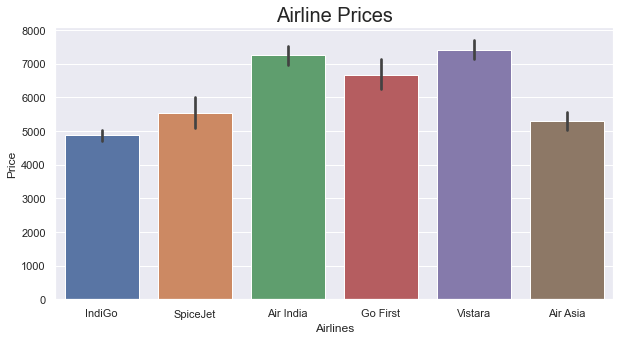

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, y = 'Price', x = 'Airlines')
plt.title("Airline Prices",fontsize = 20)

Text(0.5, 1.0, 'Prices according to Source')

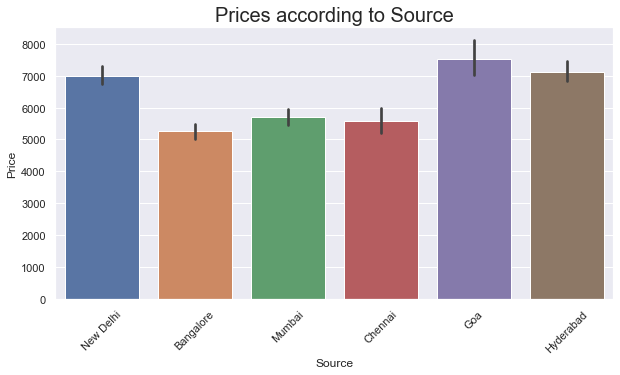

In [36]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, y = 'Price', x = 'Source')
plt.xticks(rotation = 45)
plt.title("Prices according to Source",fontsize = 20)

Text(0.5, 1.0, 'Prices according to Destination')

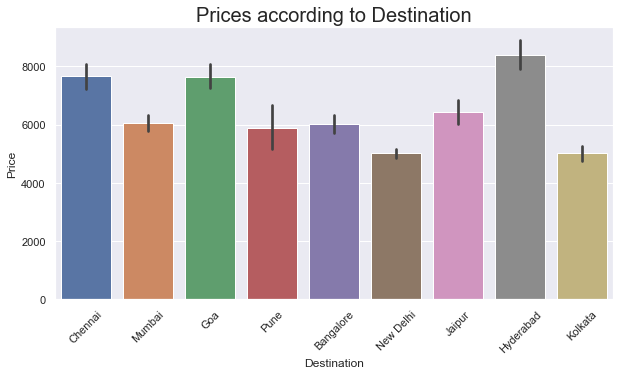

In [37]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, y = 'Price', x = 'Destination')
plt.xticks(rotation = 45)
plt.title("Prices according to Destination",fontsize = 20)

Text(0.5, 1.0, 'Prices according to Total Stops')

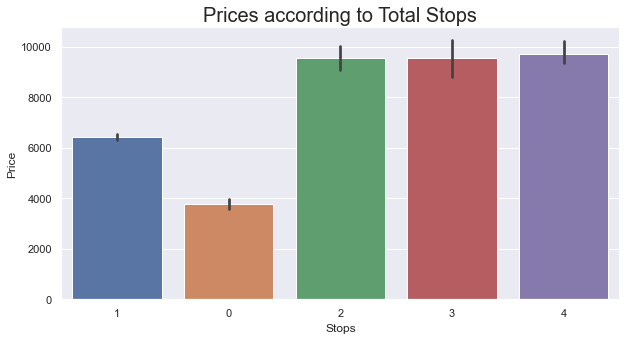

In [38]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, y = 'Price', x = 'Stops')
plt.title("Prices according to Total Stops",fontsize = 20)

Text(0.5, 1.0, 'Prices according to Additional Information')

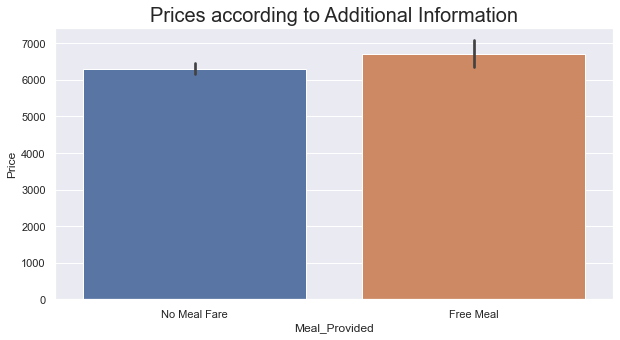

In [39]:
plt.figure(figsize = (10,5))
sns.barplot(data = df,x = 'Meal_Provided', y = 'Price')
plt.title("Prices according to Additional Information",fontsize = 20)

<AxesSubplot:xlabel='Hour_of_Arrival', ylabel='Price'>

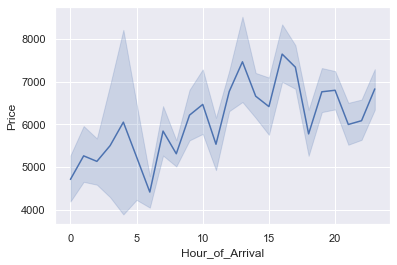

In [40]:
sns.lineplot(data = df, y = 'Price', x = 'Hour_of_Arrival')

<AxesSubplot:xlabel='Hour_of_Departure', ylabel='Price'>

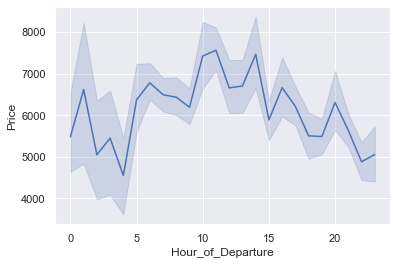

In [41]:
sns.lineplot(data = df, y = 'Price', x = 'Hour_of_Departure')

Text(0.5, 1.0, 'Prices according to Duration_Hour')

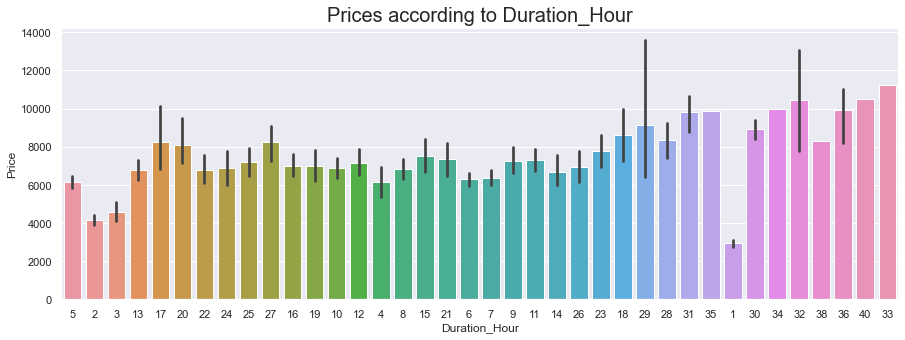

In [42]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, y = 'Price', x = 'Duration_Hour')
plt.title("Prices according to Duration_Hour",fontsize = 20)

Text(0.5, 1.0, 'Prices according to Hour of Arrival')

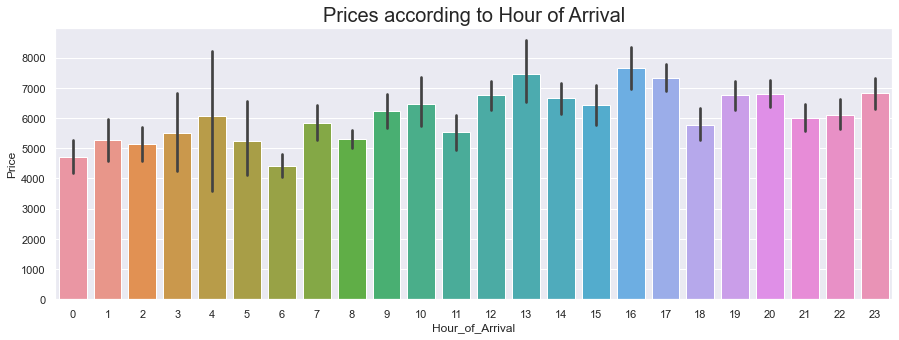

In [43]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, y = 'Price', x = 'Hour_of_Arrival')
plt.title("Prices according to Hour of Arrival",fontsize = 20)

Text(0.5, 1.0, 'Prices according to Hour of Departure')

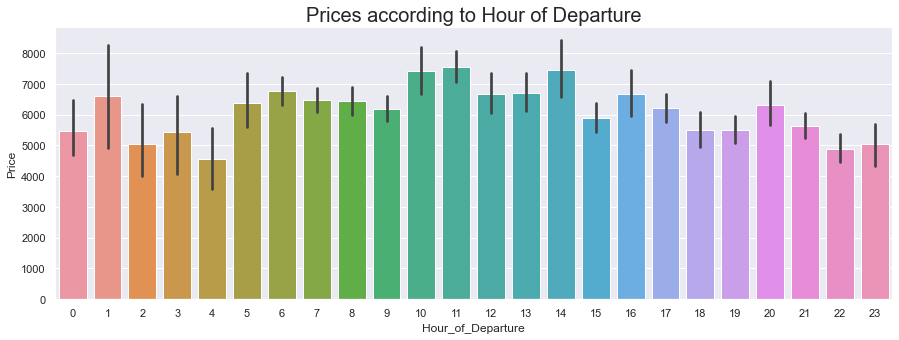

In [44]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, y = 'Price', x = 'Hour_of_Departure')
plt.title("Prices according to Hour of Departure",fontsize = 20)

#### INSIGHTS:

- Air India and Vistara offers expensive flights tickets whereas, indigo is most budget friendly.

- Hyderabad flights cost more during december and Kolkata costs least.

- Flight tickets from goa costs more and flight tickets from bangalore costs least.

- Flights with more than 1 stops costs more

- Flights with included meal costs more. 

- Flight Price increases as the Flight duration increases.

- Flights at night costs more than flights in morning.

- Flights with departure from 10am to 3pm costs more.

# Handling Skewness

In [45]:
df.Price.skew()

1.7874635571221504

<AxesSubplot:xlabel='Price'>

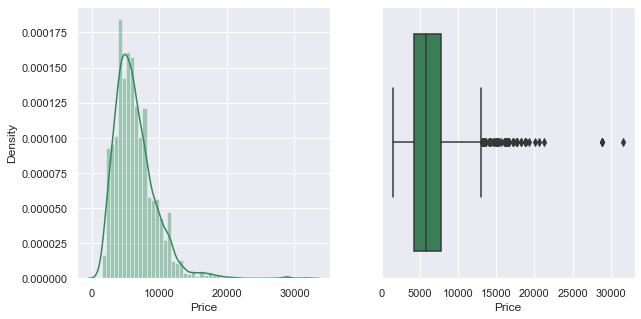

In [46]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(df['Price'],color ='seagreen',ax = ax[0])
sns.boxplot(df['Price'],color ='seagreen', ax = ax[1])

#we've rightly skewed data

In [47]:
(np.sqrt(df['Price']).skew())

0.7100826064632373

In [48]:
#Removing skewness using square-root transformation

df['Price'] = np.sqrt(df['Price'])
df['Price'].skew()

0.7100826064632373

<AxesSubplot:xlabel='Price'>

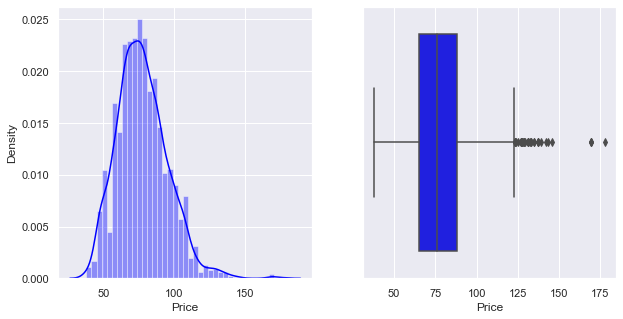

In [49]:
#Visualising outlier and skewness using boxplot and distribution plot after skewness removal

fig , ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(df['Price'],color ='blue',ax = ax[0])
sns.boxplot(df['Price'],color ='blue', ax = ax[1])


### Encoding Categorical Variables

In [50]:
X = df.drop(columns = ['Month','Year','Price'], axis = 1)
y = df['Price']

In [51]:
# Converting Numeric Columns as numeric datatype inplace of object type

X['Duration_Hour'] = X['Duration_Hour'].astype("int32")
X['Duration_Minute'] = X['Duration_Minute'].astype("int32")
X['Stops'] = X['Stops'].astype("int32")

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 0 to 2249
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airlines             2131 non-null   object
 1   Source               2131 non-null   object
 2   Destination          2131 non-null   object
 3   Stops                2131 non-null   int32 
 4   Meal_Provided        2131 non-null   object
 5   Hour_of_Departure    2131 non-null   int64 
 6   Minute_of_Departure  2131 non-null   int64 
 7   Hour_of_Arrival      2131 non-null   int64 
 8   Minute_of_Arrival    2131 non-null   int64 
 9   Duration_Hour        2131 non-null   int32 
 10  Duration_Minute      2131 non-null   int32 
 11  Day                  2131 non-null   int64 
dtypes: int32(3), int64(5), object(4)
memory usage: 256.0+ KB


In [53]:
X = pd.get_dummies(X)

In [54]:
X

,Stops,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Duration_Hour,Duration_Minute,Day,Airlines_Air Asia,Airlines_Air India,...,Destination_Chennai,Destination_Goa,Destination_Hyderabad,Destination_Jaipur,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi,Destination_Pune,Meal_Provided_Free Meal,Meal_Provided_No Meal Fare
0,1,14,0,19,20,5,20,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,7,25,10,10,2,45,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,18,25,21,10,2,45,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,20,30,23,20,2,50,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,23,5,1,55,2,50,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,1,7,0,19,55,12,55,16,0,0,...,0,0,0,0,1,0,0,0,0,1
2246,1,20,30,9,45,13,15,16,0,0,...,0,0,0,0,1,0,0,0,0,1
2247,1,12,30,9,45,21,15,16,0,0,...,0,0,0,0,1,0,0,0,1,0
2248,1,20,30,19,55,23,25,16,0,0,...,0,0,0,0,1,0,0,0,1,0


## Splitting Dataset For Model Building

In [55]:
#Using Train_test_Split for splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

### Ordinary Least Squares Stats Model

In [56]:
lm = smf.ols(formula = 'y ~ X',data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:08:22   Log-Likelihood:                -8290.8
No. Observations:                2131   AIC:                         1.664e+04
Df Residuals:                    2103   BIC:                         1.680e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.2817      0.854     48.334      0.000      39.607      42.957
X[0]          13.2828      0.587     22.611      0.000      12.131      14.435
X[1]          -0.2049      0.046     -4.441      0.000      -0.295      -0.114
X[2]          -0.0079      0.015     -0.533      0.594      -0.037       0.021
X[3]           0.2123      0.043      4.956      0.000       0.128       0.296
X[4]          -0.0363      0.015     -2.499      0.013      -0.065      -0.008
X[5]          -0.0312      0.052     -0.597      0.550      -0.134       0.071
X[6]           0.0372      0.015      2.451      0.014       0.007       0.067
X[7]          -1.5546      0.104    -15.001      0.000      -1.758      -1.351
X[8]           3.8964      0.829      4.698      0.000       2.270       5.523
X[9]           7.5803      0.631     12.013      0.000       6.343       8.818
X[10]         10.8460      0.739     14.680      0.000       9.397      12.295
X[11]          1.6318      0.558      2.923      0.004       0.537       2.726
X[12]          3.1966      1.018      3.139      0.002       1.200       5.193
X[13]         14.1307      0.584     24.186      0.000      12.985      15.276
X[14]          8.2723      0.876      9.441      0.000       6.554       9.991
X[15]         -0.3658      1.116     -0.328      0.743      -2.554       1.822
X[16]          3.4358      1.294      2.655      0.008       0.898       5.974
X[17]         19.5588      0.891     21.947      0.000      17.811      21.307
X[18]          3.7938      0.650      5.834      0.000       2.519       5.069
X[19]          6.5867      0.784      8.399      0.000       5.049       8.125
X[20]          0.6698      0.683      0.981      0.327      -0.669       2.008
X[21]          7.2134      0.778      9.274      0.000       5.688       8.739
X[22]          3.5752      1.116      3.204      0.001       1.387       5.764
X[23]         22.2857      1.145     19.470      0.000      20.041      24.530
X[24]         13.5390      1.438      9.417      0.000      10.720      16.358
X[25]         16.2318      1.876      8.653      0.000      12.553      19.910
X[26]        -13.2360      0.985    -13.441      0.000     -15.167     -11.305
X[27]         -5.4306      0.835     -6.504      0.000      -7.068      -3.793
X[28]         -3.5665      1.783     -2.000      0.046      -7.063      -0.070
X[29]         21.1971      0.615     34.441      0.000      19.990      22.404
X[30]         20.0846      0.540     37.163      0.000      19.025      21.144
==============================================================================
Omnibus:                      521.497   Durbin-Watson:                   0.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2138.089
Skew:                           1.132   Prob(JB):                         0.00
Ku

### Linear Regression

In [57]:
#Model Instantiating and Fitting

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [58]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  58.98 %
Linear Regression Model Confidence on testing set :  47.31 %


In [59]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [60]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  79.19253146985076 

Features and their corresponding weights:


,features,coefficients
0,Stops,13.500642
1,Hour_of_Departure,-0.194824
2,Minute_of_Departure,-0.009857
3,Hour_of_Arrival,0.246927
4,Minute_of_Arrival,-0.039880
5,Duration_Hour,-0.026389
6,Duration_Minute,0.036490
7,Day,-1.519416
8,Airlines_Air Asia,-2.658697
9,Airlines_Air India,0.526020


In [61]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.4730877280324799
Mean Absolute Error for our Linear Regression Model: 9.618979715926962
Mean Squared Error for our Linear Regression Model: 179.6484865090259
Root Mean Squared Error for our Linear Regression Model: 13.403301328740838


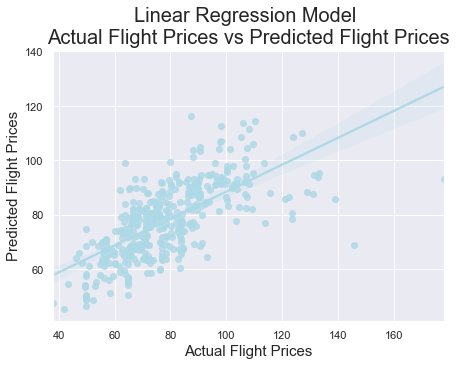

In [62]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'lightblue')
plt.xlabel('Actual Flight Prices', fontsize =15)
plt.ylabel('Predicted Flight Prices', fontsize = 15)
plt.title('Linear Regression Model \nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

## Lasso Regularization

In [63]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.0007410703609325496

In [64]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0007410703609325496)

In [65]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  47.3 %


In [66]:
#Applying Evaluation metrics to our Regression model
test = lasso_reg.predict(X_test)
print('R squared for our Lasso Regularization Model:', r2_score(y_test,test))
print('Mean Absolute Error for our Lasso Regularization Model:',mean_absolute_error(y_test,test))
print('Mean Squared Error for our Lasso Regularization Model:',mean_squared_error(y_test,test))
print('Root Mean Squared Error for our Lasso Regularization Model:',np.sqrt(mean_squared_error(y_test,test)))

R squared for our Lasso Regularization Model: 0.4731213262868502
Mean Absolute Error for our Lasso Regularization Model: 9.620117487784109
Mean Squared Error for our Lasso Regularization Model: 179.63703132783522
Root Mean Squared Error for our Lasso Regularization Model: 13.402873995074161


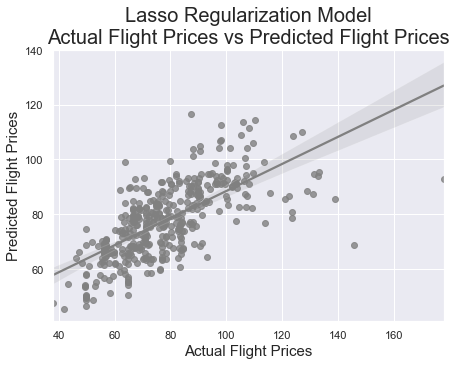

In [67]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=test,data=X, color = 'grey')
plt.xlabel('Actual Flight Prices', fontsize =15)
plt.ylabel('Predicted Flight Prices', fontsize = 15)
plt.title('Lasso Regularization Model\nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Decision Tree Regressor

In [68]:
#Model instantiating and fitting

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [69]:
#Applying Evaluation metrics to our Regression model
prd = dt.predict(X_test)

print('R squared for our Decision Tree Regression Model:', r2_score(y_test,prd))
print('Mean Absolute Error for our  Decision Tree Regression Model:',mean_absolute_error(y_test,prd))
print('Mean Squared Error for our  Decision Tree Regression Model:',mean_squared_error(y_test,prd))
print('Root Mean Squared Error for our  Decision Tree Regression Model:',np.sqrt(mean_squared_error(y_test,prd)))

R squared for our Decision Tree Regression Model: 0.4971896538524053
Mean Absolute Error for our  Decision Tree Regression Model: 7.284093585037054
Mean Squared Error for our  Decision Tree Regression Model: 171.4310379395811
Root Mean Squared Error for our  Decision Tree Regression Model: 13.093167605265775


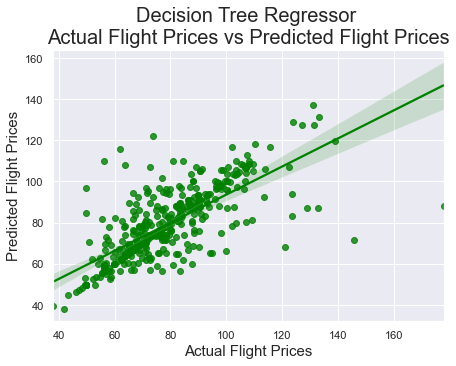

In [70]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=prd,data=X, color = 'green')
plt.xlabel('Actual Flight Prices', fontsize = 15)
plt.ylabel('Predicted Flight Prices', fontsize = 15)
plt.title('Decision Tree Regressor \nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Random Forest Regressor

In [71]:
# Model Instantiating and fitting
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [72]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Random Forest Regressor Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Random Forest Regressor Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Random Forest Regressor Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Random Forest Regressor Model:',np.sqrt(mean_squared_error(y_test,pred)))

R squared for our Random Forest Regressor Model: 0.6360590772966401
Mean Absolute Error for our Random Forest Regressor Model: 6.712655646786517
Mean Squared Error for our Random Forest Regressor Model: 124.08410170106501
Root Mean Squared Error for our Random Forest Regressor Model: 11.139304363427055


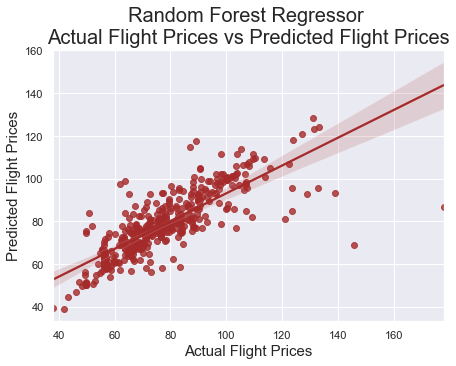

In [73]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=pred,data=X, color = 'brown')
plt.xlabel('Actual Flight Prices', fontsize = 15 )
plt.ylabel('Predicted Flight Prices', fontsize = 15)
plt.title('Random Forest Regressor \nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### K Nearest Neighbor Regressor

In [74]:
#Model fitting and Instantiating

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [75]:
print("Model Confidence on training Dataset: ",knn.score(X_train,y_train)*100,'%')
print("Model Confidence on test Dataset:",knn.score(X_test,y_test)*100,'%')

Model Confidence on training Dataset:  50.921640760662434 %
Model Confidence on test Dataset: 16.957572662096798 %


In [76]:
knnpred  = knn.predict(X_test)
#Applying Evaluation metrics to our KNN Regression model
print('R2 Score for KNN Regression Model:', r2_score(y_test,knnpred))
print('Mean Absolute Error for our KNN Regression Model:',mean_absolute_error(y_test,knnpred))
print('Mean Squared Error for our KNN Regression Model:',mean_squared_error(y_test,knnpred))
print('Root Mean Squared Error for our KNN Regression Model:',np.sqrt(mean_squared_error(y_test,knnpred)))

R2 Score for KNN Regression Model: 0.16957572662096798
Mean Absolute Error for our KNN Regression Model: 12.509533711170684
Mean Squared Error for our KNN Regression Model: 283.12960583711117
Root Mean Squared Error for our KNN Regression Model: 16.826455533983122


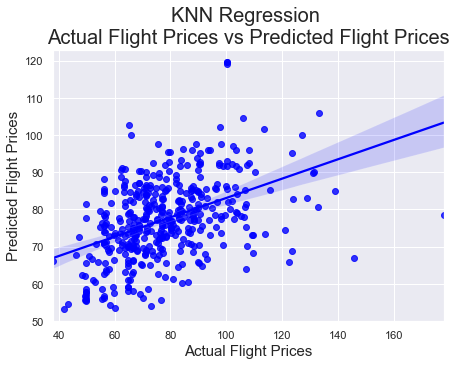

In [77]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'blue')
plt.xlabel('Actual Flight Prices',fontsize = 15)
plt.ylabel('Predicted Flight Prices', fontsize = 15)
plt.title('KNN Regression \nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Gradient Boosting Regressor

In [78]:
#Model Instantiating and fitting

gradient = GradientBoostingRegressor()
gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [79]:
grpred = gradient.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,grpred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,grpred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,grpred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,grpred)))

R2 Score for Gradient Boostin Regresser Model: 0.5966504250035778
Mean Absolute Error for our Gradient Boostin Regresser Model: 8.11557177062039
Mean Squared Error for our Gradient Boostin Regresser Model: 137.520313223285
Root Mean Squared Error for our Gradient Boostin Regresser Model: 11.72690552632215


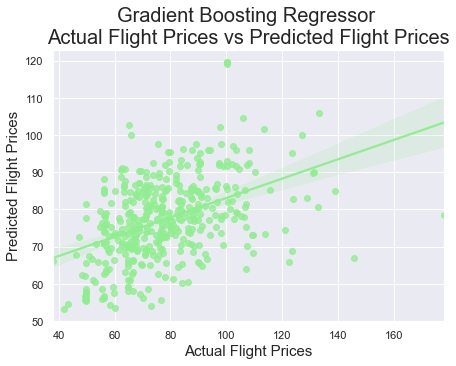

In [80]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'lightgreen')
plt.xlabel('Actual Flight Prices', fontsize = 15)
plt.ylabel('Predicted Flight Prices',fontsize =15)
plt.title('Gradient Boosting Regressor \nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Bagging Regressor

In [81]:
#Model Instantiating and fitting

bagging = BaggingRegressor()
bagging.fit(X_train,y_train)

BaggingRegressor()

In [82]:
bgpred = bagging.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,bgpred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,bgpred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,bgpred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,bgpred)))

R2 Score for Gradient Boostin Regresser Model: 0.6085993593467809
Mean Absolute Error for our Gradient Boostin Regresser Model: 7.038418285005495
Mean Squared Error for our Gradient Boostin Regresser Model: 133.4463751422139
Root Mean Squared Error for our Gradient Boostin Regresser Model: 11.551899200660205


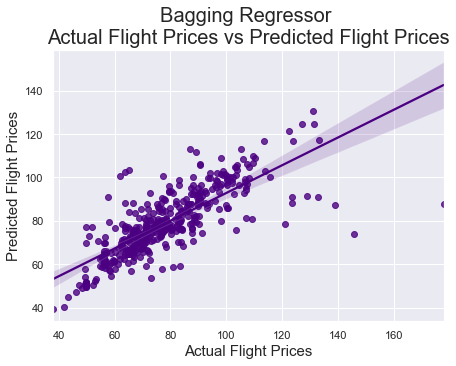

In [83]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=bgpred,data=X, color = 'indigo')
plt.xlabel('Actual Flight Prices',fontsize =15)
plt.ylabel('Predicted Flight Prices', fontsize = 15)
plt.title('Bagging Regressor \nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Adaboost Regressor

In [84]:
#Model Instantiating and fitting

ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [85]:
adapred = ada.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,adapred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,adapred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,adapred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,adapred)))

R2 Score for Gradient Boostin Regresser Model: 0.3814565829365676
Mean Absolute Error for our Gradient Boostin Regresser Model: 11.327392866015614
Mean Squared Error for our Gradient Boostin Regresser Model: 210.8897336944479
Root Mean Squared Error for our Gradient Boostin Regresser Model: 14.522043027564955


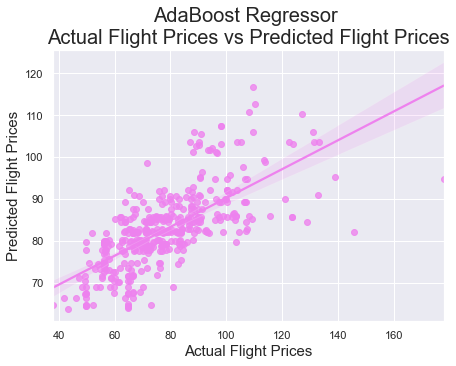

In [86]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=adapred,data=X, color = 'violet')
plt.xlabel('Actual Flight Prices', fontsize = 15)
plt.ylabel('Predicted Flight Prices', fontsize = 15)
plt.title('AdaBoost Regressor \nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

## XGB Regressor

In [87]:
#Model fitting and Instantiating
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
#Applying Evaluation metrics to our Tuned Ridge Regression model
xgbpred = xgb.predict(X_test)

print('R2 Score for XGB Regressor Model:', r2_score(y_test,xgbpred))
print('Mean Absolute Error for our Tuned XGB Regressor Model:',mean_absolute_error(y_test,xgbpred))
print('Mean Squared Error for our Tuned XGB Regressor Model:',mean_squared_error(y_test,xgbpred))
print('Root Mean Squared Error for our XGB Regressor Model:',np.sqrt(mean_squared_error(y_test,xgbpred)))

R2 Score for XGB Regressor Model: 0.619639533415801
Mean Absolute Error for our Tuned XGB Regressor Model: 7.182033081550933
Mean Squared Error for our Tuned XGB Regressor Model: 129.6822749915575
Root Mean Squared Error for our XGB Regressor Model: 11.38781256394561


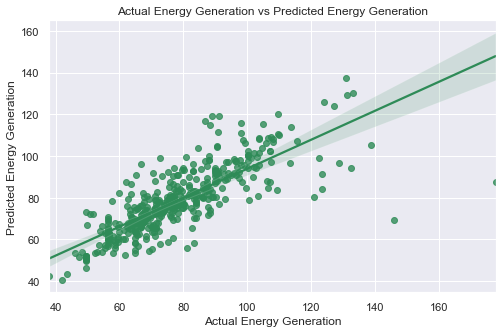

In [89]:
#Plotting Regression Line
plt.figure(figsize = (8,5))
sns.regplot(x=y_test,y=xgbpred,data=df, color = 'seagreen')
plt.xlabel('Actual Energy Generation')
plt.ylabel('Predicted Energy Generation')
plt.title('Actual Energy Generation vs Predicted Energy Generation')
plt.show()

## Conclusion :
- Among all other models Random Forest Regressor Model seems to giving us high scores among all evaluation metrics : 
    - R_square Score: 0.6305
    - MAE : 6.7126
    - MSE : 124.0841
    - RMSE : 11.1393

## HyperParameter Tuning

In [133]:
param_grid = { 'min_samples_leaf' : [2,3,4,5,6,7,8,9,10,15,20,25,30,35]
              ,'min_samples_split' : [2,3,4,5,6,7,8,9,10,15,20,25,30],
              'bootstrap': [True,False], 'max_depth': [5, 10,20,25,30,35, None], 
              'max_features': ['auto', 'log2'], 'n_estimators': [50,100,150,200,250,300]}

In [134]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                              n_iter = 300, cv = 3, verbose=2, random_state=42)

In [135]:
#Fitting our Random Search CV
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV] END bootstrap=False, max_depth=25, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=25, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=25, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=25, min_samples_split=2, n_estimators=150

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=300,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 25, 30, 35,
                                                      None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 15, 20,
                                                             25, 30, 35],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 15, 20,
                                                              25, 30],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42, verb

In [136]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [137]:
#Instantiating Our Final Model

Model = RandomForestRegressor(n_estimators = 200 ,max_features = 'log2', min_samples_split = 2,
                              min_samples_leaf = 2, max_depth = None ,bootstrap = False)


#Fitting our final Model

Model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_leaf=2,
                      n_estimators=200)

In [138]:
#Applying Evaluation metrics to our Tuned Random Forest Regression model
y_pred = Model.predict(X_test)

print('R2 Score for Tuned Random Forest Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Tuned Random Forest Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Tuned Random Forest Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Random Forest Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Tuned Random Forest Regression Model: 0.6517222492391408
Mean Absolute Error for our Tuned Random Forest Regression Model: 6.969208883580847
Mean Squared Error for our Tuned Random Forest Regression Model: 118.74381018936087
Root Mean Squared Error for our Random Forest Linear Regression Model: 10.896963347160568


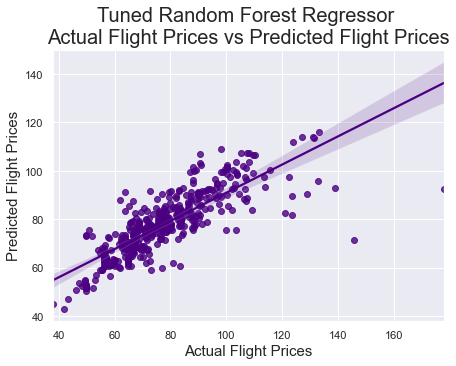

In [139]:
#Plotting Regression Line
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'indigo')
plt.xlabel('Actual Flight Prices', fontsize = 15)
plt.ylabel('Predicted Flight Prices',  fontsize = 15)
plt.title('Tuned Random Forest Regressor \nActual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

## Saving Our Final Model

In [143]:
joblib.dump(Model,"FlightPricePredictionAnalysis.pkl")

['FlightPricePredictionAnalysis.pkl']

## Loading Final Model

In [ ]:
Model = joblib.load("FlightPricePredictionAnalysis.pkl")

In [144]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = Model.predict(X_test)
prediction = pd.DataFrame(prediction)

In [148]:
#Creating a dataset of Actual vs Predicted Datapoints
Flights_Prices = pd.DataFrame({})
Flights_Prices['Actual_Flight_Prices'] = y[:400]
Flights_Prices['Predicted_Flight_Prices'] = prediction
Flights_Prices

,Actual_Flight_Prices,Predicted_Flight_Prices
0,70.149840,60.986067
1,76.967526,64.148292
2,76.967526,72.711530
3,76.967526,50.358304
4,76.967526,89.491376
...,...,...
397,90.901045,64.262083
398,90.901045,113.826198
399,91.203070,82.000961
400,92.913939,74.771219


In [149]:
#Converting the saved file into .csv format
Flights_Prices.to_csv('Results.csv',index = True)